I will be using Random Forest Regressor for this project where in i Will be forecasting the audience ratings based on certain key features which i will be choosing depending on the correlation with the audience_rating.

In [5]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt


I have used a csv file instead of the provided excel as there were some issue reading the excel file in my local machine(Jupyter Notebook), although there were no issues running it in Google Colab

In [45]:
df=pd.read_csv("Rotten_Tomatoes_Movies.csv",encoding='unicode_escape') #comment out this line and uncomment the below line if you're running it in Colab

#df=pd.read_excel("Rotten_Tomatoes_Movies3.xls") #Uncomment this line if you're running it in Google Colab

In [46]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12/2/2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",5/10/1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,6/3/2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0


In [47]:
df.info() #Checking the Data type and Column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
dtypes: f

In [48]:
df.isnull().sum() #getting the count of null values in each column

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

Since the forecasting of audience_rating has to be done and hence I have eliminated the null values in the audience_rating column as it will introduce anomalies if we include mean or median values and will affect the accuracy of the prediction.

In [49]:
data=df.dropna(subset=["audience_rating"]) #eliminating null values

Encoding the string content with lable encoder, converting it into numeric values to find correlation, One-Hot encoding could well be used but it will in turn increase the complexity by adding more columns and hence i have went ahead with Label Encoder

In [ ]:
label_encoders = {}
categorical_columns = ['movie_title', 'movie_info', 'critics_consensus', 'cast', 'in_theaters_date', 'on_streaming_date','rating', 'genre', 'directors', 'writers', 'studio_name','tomatometer_status']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Convert to string to avoid errors with non-numeric categories
    label_encoders[col] = le

In [51]:
data #The data after Encoding

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,9076,1944,7204,3,216,1313,2298,9646,873,1594,83.0,6,2,49,144,53.0
1,9226,9290,4670,6,750,5809,8600,2444,4384,802,90.0,2276,0,86,140,64.0
2,18,4234,8278,6,856,870,1273,4194,4761,1462,118.0,2702,1,68,22,53.0
3,47,444,5469,2,687,7151,9463,10179,1016,1979,95.0,638,0,100,51,97.0
4,97,13769,4782,0,285,6466,3321,6642,33,930,127.0,704,1,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,15854,3792,8278,6,983,4888,7266,3496,2292,1446,104.0,1493,2,56,9,74.0
16634,15855,13225,6538,3,15,1117,5091,5461,4669,2074,108.0,2690,0,97,279,92.0
16635,15856,7086,8278,2,58,8153,11964,1016,1895,1684,142.0,988,1,78,9,87.0
16636,15857,5915,8278,3,687,1593,2329,14253,1790,852,139.0,1881,1,95,21,91.0


In [54]:
corr_matrix=data.corr() 
corr_matrix #obtaining the correlation matrix from encoded data

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
movie_title,1.000000,0.065735,0.094110,-0.008366,-0.021857,0.010879,-0.010593,0.013808,-0.005924,-0.004874,0.020485,0.005104,-0.007388,0.023326,0.019865,0.021906
movie_info,0.065735,1.000000,0.019677,-0.031260,-0.030142,0.036225,0.016140,0.044771,-0.015516,-0.013832,0.005755,0.026978,-0.006470,0.020049,-0.014073,0.034712
critics_consensus,0.094110,0.019677,1.000000,-0.161280,0.000170,0.004132,0.026186,0.016009,-0.014446,0.016180,-0.093738,-0.006415,0.236844,-0.077169,-0.468565,-0.127764
rating,-0.008366,-0.031260,-0.161280,1.000000,0.068580,0.016824,-0.042317,-0.013754,-0.008892,-0.008744,0.080477,0.016955,0.096127,-0.232154,0.242313,-0.167589
genre,-0.021857,-0.030142,0.000170,0.068580,1.000000,-0.032253,0.035192,-0.018816,0.037655,0.002970,-0.062443,-0.033684,-0.015826,0.015858,-0.041026,-0.030530
directors,0.010879,0.036225,0.004132,0.016824,-0.032253,1.000000,0.355700,0.049733,-0.008539,0.001917,0.028828,0.008970,0.015306,-0.019526,0.006712,0.002740
writers,-0.010593,0.016140,0.026186,-0.042317,0.035192,0.355700,1.000000,0.072166,0.005926,0.013674,-0.027722,0.001721,-0.026244,0.048606,-0.057658,0.042267
cast,0.013808,0.044771,0.016009,-0.013754,-0.018816,0.049733,0.072166,1.000000,-0.011355,0.011391,0.004029,0.004205,-0.013478,0.019609,-0.015165,0.029818
in_theaters_date,-0.005924,-0.015516,-0.014446,-0.008892,0.037655,-0.008539,0.005926,-0.011355,1.000000,0.057831,-0.027004,0.007360,-0.000219,-0.009804,0.025748,-0.037289
on_streaming_date,-0.004874,-0.013832,0.016180,-0.008744,0.002970,0.001917,0.013674,0.011391,0.057831,1.000000,-0.009409,0.002021,0.021331,-0.013200,-0.034233,-0.016129


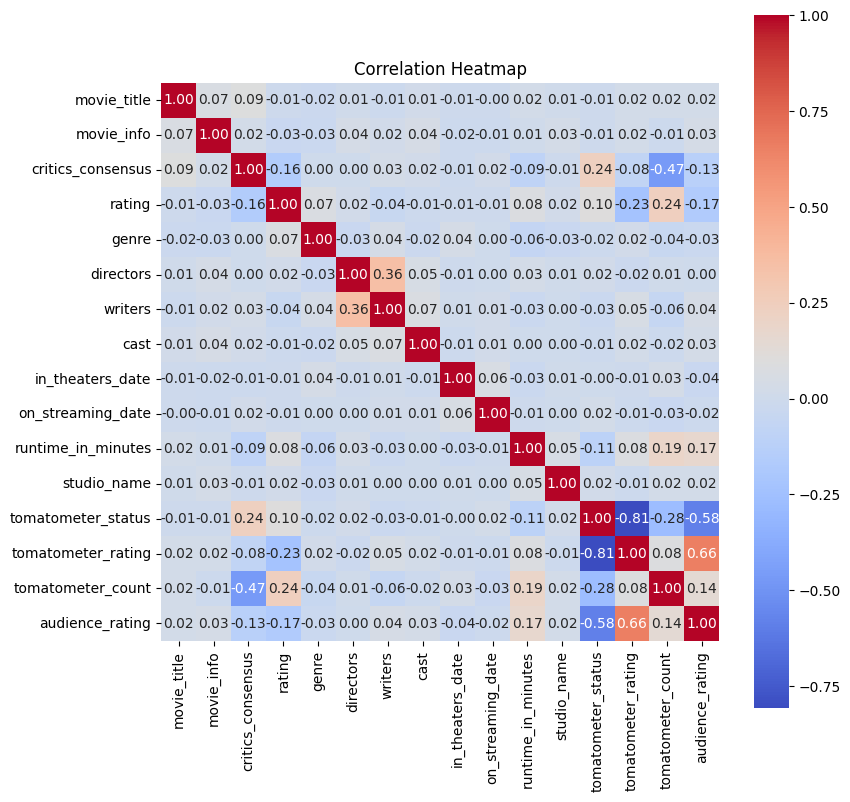

In [56]:
#Plotting the correlation matix in the form of a heatmap for better visual understanding

plt.figure(figsize=(9, 9))


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True) #


plt.title('Correlation Heatmap')
plt.show()

In the above heatmap we can see that the audience rating has the **highest correlation  with tomatometer_rating and tomatometer_status (-ve correlation)** which are both significantly higher correlated features we are going to consider for the prediction.

Also considering the null value count we can eliminate the following columns ['movie_title', 'movie_info', 'critics_consensus','genre', 'directors', 'cast', 'writers', 'in_theaters_date',  'on_streaming_date', 'runtime_in_minutes', 'studio_name','tomatometer_count'] ,as they have insignificant correlation and also a lot of missing values which can be filled with unknown variables but again introduces more anomallies.

In [57]:
data=data.drop(columns=[ 'movie_title', 'movie_info', 'critics_consensus','genre','directors', 'cast','writers','in_theaters_date', 'on_streaming_date','runtime_in_minutes','studio_name','tomatometer_count'])

In [58]:
data #Data after droppin the columns which contain anomolies in data which might affect the forecasting

,rating,tomatometer_status,tomatometer_rating,audience_rating
0,3,2,49,53.0
1,6,0,86,64.0
2,6,1,68,53.0
3,2,0,100,97.0
4,0,1,89,74.0
...,...,...,...,...
16633,6,2,56,74.0
16634,3,0,97,92.0
16635,2,1,78,87.0
16636,3,1,95,91.0


In [17]:
X = data.drop(columns=['audience_rating']) #assigning every column except 'audience_rating' to 'X'
y = data['audience_rating'] #assigning the target column 'audience_rating' to 'y'

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Employing a 80:20 Train Test split

In [60]:
model=RandomForestRegressor(n_estimators=100, random_state=42) #assigning the model and fitting the model with training data
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [61]:
y_pred=model.predict(X_test) #predicting the trained model with the test input

In [64]:
print("Model Evaluation Metrics:\n")

print(f"Mean Absolute Error (MAE): {mae:.6f}")
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.6f}")
mse = mean_squared_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R²): {r2:.6f}")


Model Evaluation Metrics:

Mean Absolute Error (MAE): 12.052472
Mean Squared Error: 227.660217
Root Mean Squared Error (RMSE): 15.088413
R-Squared (R²): 0.448384


In [63]:
baseline_pred = np.mean(y_train)
baseline_rmse = np.sqrt(mean_squared_error(y_test, [baseline_pred] * len(y_test)))
print(f"Baseline RMSE: {baseline_rmse}")


Baseline RMSE: 20.316394254868985


We are calculating a baseline RMSE to evaluate of our model is within the baseline RMS Error, from the above cell outputs its clear that the model is well within our baseline RMSE which is 20.3 and the model's RMSE is 15.08 , but there seems to be still room for improvement so I'm emloying hyperparameter tuning

In [66]:
#creating a dictonary with parameter values 

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto','sqrt','log2']}


In [71]:
#using Gridsearch Cross Validation to find the optimal 
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid,
                                   n_iter=20, # Number of random combinations to test
                                   cv=5, # Cross-validation folds
                                   scoring='neg_mean_squared_error',
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

In [73]:
random_search.fit(X_train, y_train) #the random search algorithm searches through random combinations of the parameters and provides best Parameters

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
print(random_search.best_params_) #these are the best performing parameters according to Randomized Search Cross Validation model

{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


In [80]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Improved RMSE: {rmse}")

Improved RMSE: 14.981361570582646


In [81]:
y_test_new = y_test.reset_index(drop=True)

In [82]:
y_pred_new=pd.DataFrame(y_pred)

In [90]:
def plotGraph(y_test,y_pred,model):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(model)
    plt.show()
    return

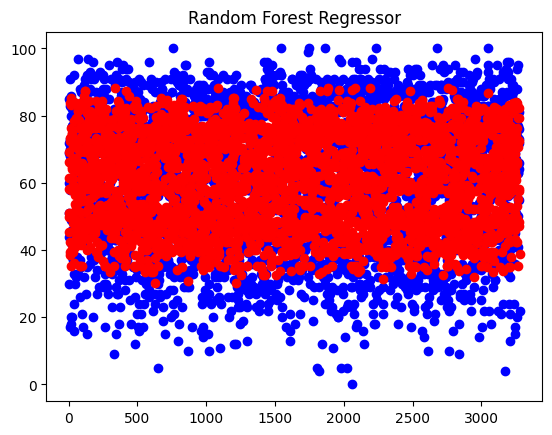

In [91]:
plotGraph(y_test_reset,y_pred_reset,"Random Forest Regressor")

In [85]:
result = pd.concat([y_test_reset,y_pred_reset],axis=1)

In [86]:
result.columns = ['actual', 'predicted']

In [87]:
result

,actual,predicted
0,69.0,51.094447
1,30.0,45.271128
2,44.0,58.175038
3,85.0,69.212187
4,51.0,66.207650
...,...,...
3273,72.0,57.696888
3274,66.0,48.493890
3275,81.0,82.380229
3276,76.0,58.046878


In [88]:
# Filter out zero values from y_test to avoid division by zero
non_zero_indices = y_test != 0
y_test_non_zero = y_test[non_zero_indices]
y_pred_non_zero = y_pred[non_zero_indices]

# Calculate the Mean Accuracy Percentage
accuracy = 1 - (np.mean(np.abs(y_test_non_zero - y_pred_non_zero) / y_test_non_zero))
accuracy_percentage = accuracy * 100

print(f"Mean Accuracy Percentage of the model: {accuracy_percentage:.2f}%")


Mean Accuracy Percentage of the model: 72.69%


My model has an accuracy percentage of 72.69% which is optimal for a model using real world dataset, and upon hyper parameter tuning there seems to be a reduction in RMSE value, I'm satisfied with the obtained output. hence here's my submission for the assignment

# References


* https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestRegressor.html

* https://scikit-learn.org/1.5/api/sklearn.metrics.html

* https://datascience.stackexchange.com/questions/30912/what-does-baseline-mean-in-the-context-of-machine-learning

* https://stackoverflow.com/questions/65539013/how-to-plot-a-graph-of-actual-vs-predict-values-in

* https://youtu.be/YUsx5ZNlYWc

##### incase of queries contact 
ksvasanth7342@gmail.com